# Segmentasi Gambar dengan Clustering

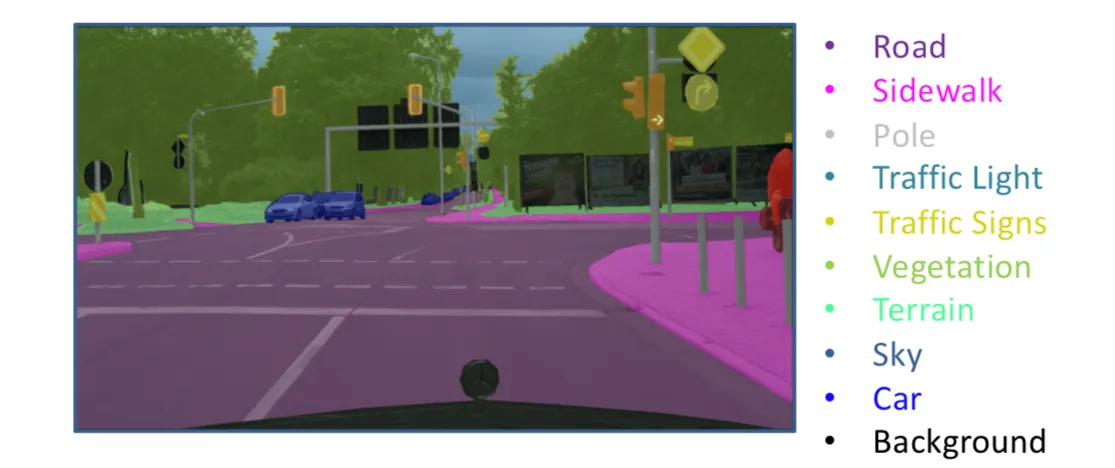

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

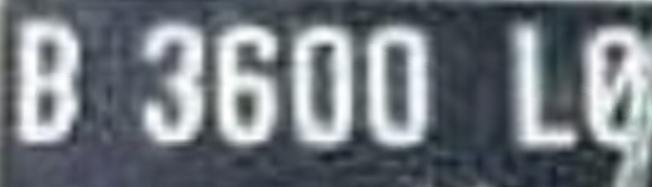

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Jawaban

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

In [3]:
# Load Gambar
img_list = []

# Load and append each image to the list
img_1 = cv2.imread('/content/drive/MyDrive/Machine_Learning/UTS/1.jpg')
img_list.append(img_1)

img_2 = cv2.imread('/content/drive/MyDrive/Machine_Learning/UTS/2.jpg')
img_list.append(img_2)

img_3 = cv2.imread('/content/drive/MyDrive/Machine_Learning/UTS/3.jpg')
img_list.append(img_3)

img_4 = cv2.imread('/content/drive/MyDrive/Machine_Learning/UTS/4.jpg')
img_list.append(img_4)

img_5 = cv2.imread('/content/drive/MyDrive/Machine_Learning/UTS/5.jpg')
img_list.append(img_5)

In [4]:
h_1, w_1, ch_1= img_1.shape
h_2, w_2, ch_2= img_2.shape
h_3, w_3, ch_3= img_3.shape
h_4, w_4, ch_4= img_4.shape
h_5, w_5, ch_5= img_5.shape

print(f"Image 1: Height = {h_1}, Width = {w_1}, Channels = {ch_1}")
print(f"Image 2: Height = {h_2}, Width = {w_2}, Channels = {ch_2}")
print(f"Image 3: Height = {h_3}, Width = {w_3}, Channels = {ch_3}")
print(f"Image 4: Height = {h_4}, Width = {w_4}, Channels = {ch_4}")
print(f"Image 5: Height = {h_5}, Width = {w_5}, Channels = {ch_5}")

Image 1: Height = 343, Width = 1183, Channels = 3
Image 2: Height = 359, Width = 1297, Channels = 3
Image 3: Height = 300, Width = 778, Channels = 3
Image 4: Height = 738, Width = 1023, Channels = 3
Image 5: Height = 258, Width = 1101, Channels = 3


In [5]:
# Define a function to process an image
def process_image(img):
    # Get image properties
    h, w, ch = img.shape

    # Normalize the image data
    data = img / 255.0

    # Reshape the data
    data = data.reshape(h * w, ch)

    return data

data_1 = process_image(img_1)
data_2 = process_image(img_2)
data_3 = process_image(img_3)
data_4 = process_image(img_4)
data_5 = process_image(img_5)

print(f"Data 1 Shape = {data_1.shape}")
print(f"Data 2 Shape = {data_2.shape}")
print(f"Data 3 Shape = {data_3.shape}")
print(f"Data 4 Shape = {data_4.shape}")
print(f"Data 5 Shape = {data_5.shape}")

Data 1 Shape = (405769, 3)
Data 2 Shape = (465623, 3)
Data 3 Shape = (233400, 3)
Data 4 Shape = (754974, 3)
Data 5 Shape = (284058, 3)


In [6]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

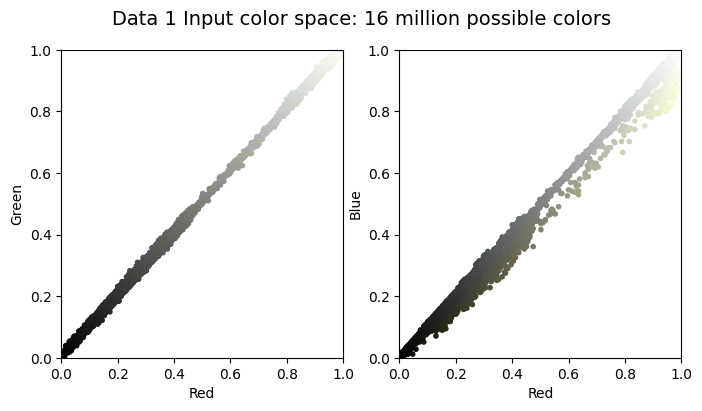

In [7]:
plot_pixels(data_1, title='Data 1 Input color space: 16 million possible colors')

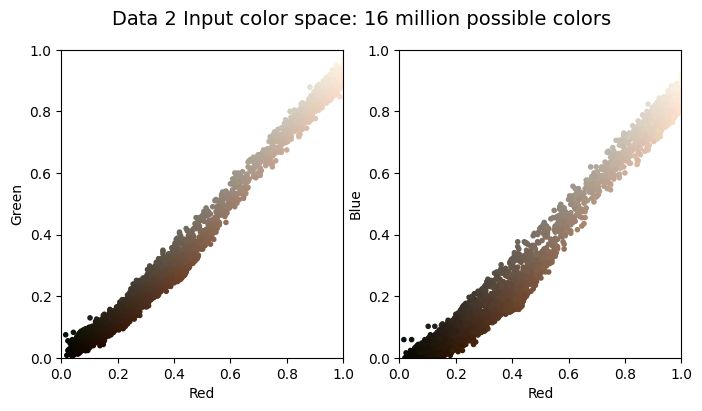

In [8]:
plot_pixels(data_2, title='Data 2 Input color space: 16 million possible colors')

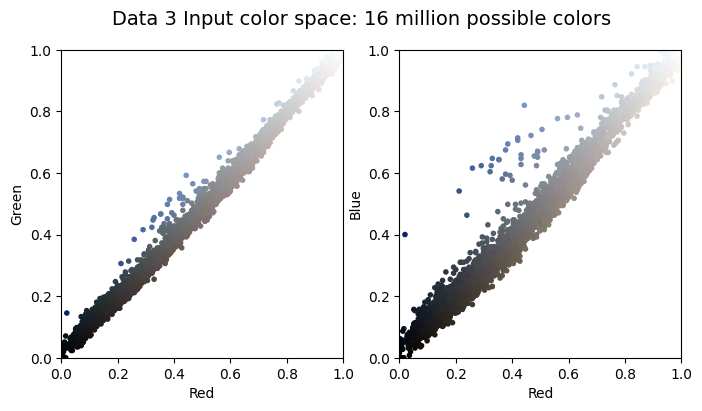

In [9]:
plot_pixels(data_3, title='Data 3 Input color space: 16 million possible colors')

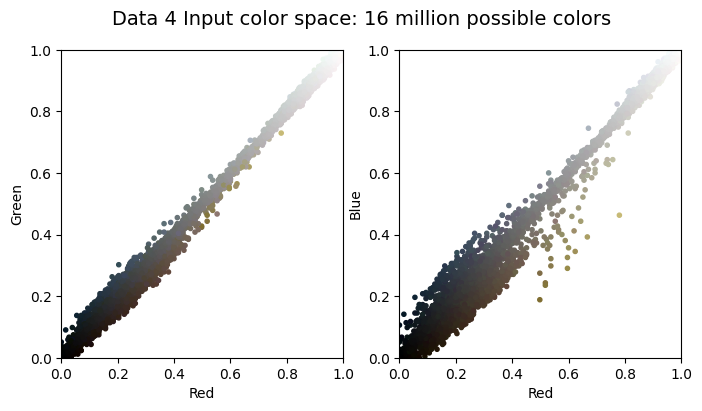

In [10]:
plot_pixels(data_4, title='Data 4 Input color space: 16 million possible colors')

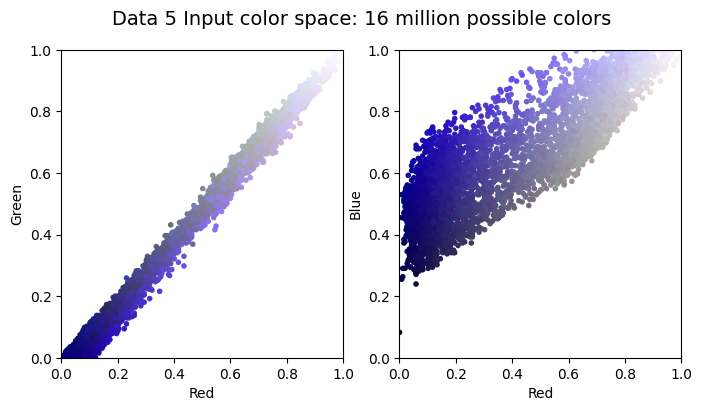

In [11]:
plot_pixels(data_5, title='Data 5 Input color space: 16 million possible colors')

In [12]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
# Then convert to float type
# Create an empty list to store the processed pixel values
processed_pixel_vals_list = []

def reshape_pixel(img):
    # Reshape and convert pixel values to float32
    pixel_vals = img.reshape((-1, 3))
    pixel_vals = np.float32(pixel_vals)

    # Append the processed pixel values to the list
    processed_pixel_vals_list.append(pixel_vals)

reshape_pixel(img_1)
reshape_pixel(img_2)
reshape_pixel(img_3)
reshape_pixel(img_4)
reshape_pixel(img_5)

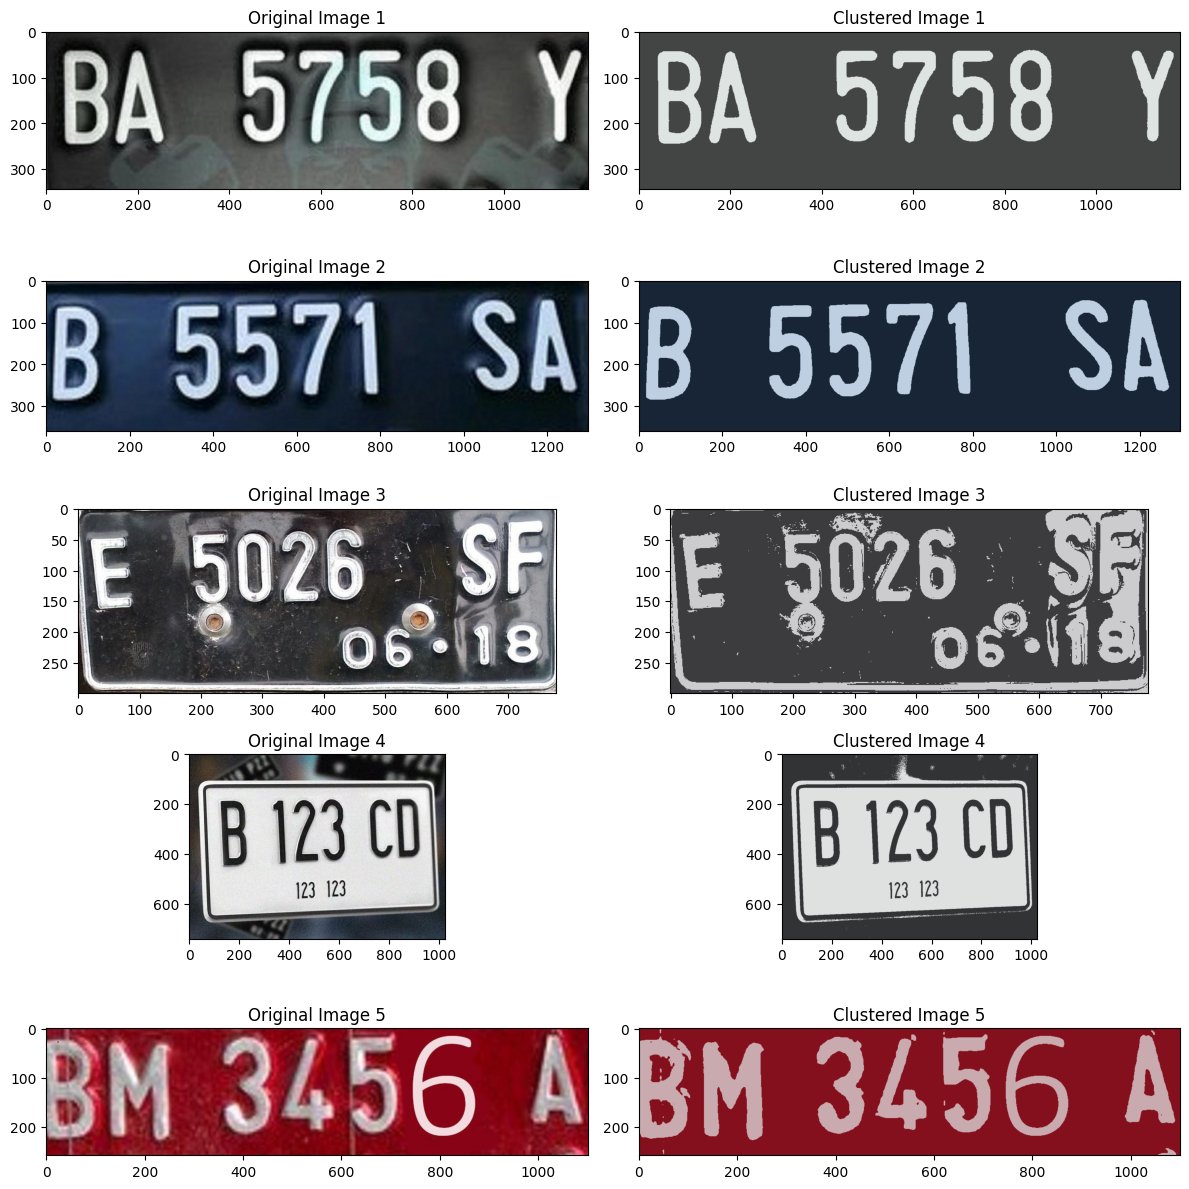

In [13]:
# K-means clustering parameters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 2

# Create a list to store clustered images
clustered_images = []

# Create a figure to display all images
plt.figure(figsize=(12, 12))

# Ensure that 'i' is within the valid range
for i, pixel_vals in enumerate(processed_pixel_vals_list):
    if i < len(img_list):
        # Perform k-means clustering
        retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        # Convert data into 8-bit values
        centers = np.uint8(centers)
        segmented_data = centers[labels.flatten()]

        # Reshape data into the original image dimensions
        segmented_image = segmented_data.reshape((img_list[i].shape))
        clustered_images.append(segmented_image)

        # Display the original and clustered images in subplots
        plt.subplot(5, 2, 2 * i + 1)  # 5 rows, 2 columns
        plt.imshow(cv2.cvtColor(img_list[i], cv2.COLOR_BGR2RGB))
        plt.title(f'Original Image {i + 1}')

        plt.subplot(5, 2, 2 * i + 2)  # 5 rows, 2 columns
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Clustered Image {i + 1}')

plt.tight_layout()
plt.show()

Pada gambar no 3, hasil dari k-means terjadi over segmentasi sehingga gambar dari clustered image kurang nampak jelas.

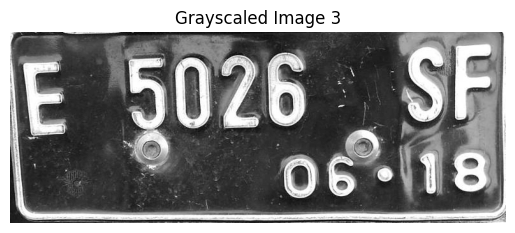

In [14]:
img_3_gray = cv2.cvtColor(img_3, cv2.COLOR_BGR2GRAY)

# Display the grayscale image with the 'gray' colormap
plt.imshow(img_3_gray, cmap='gray')
plt.title(f'Grayscaled Image 3')
plt.axis('off')
plt.show()

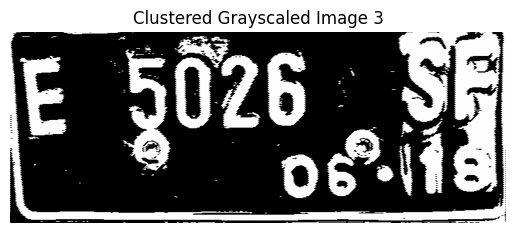

In [15]:
reshape_pixel(img_3_gray)

# Perform k-means clustering
retval, labels, centers = cv2.kmeans(processed_pixel_vals_list[5], k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img_3_gray.shape))

plt.imshow(segmented_image, cmap='gray')
plt.title(f'Clustered Grayscaled Image 3')
plt.axis('off')
plt.show()

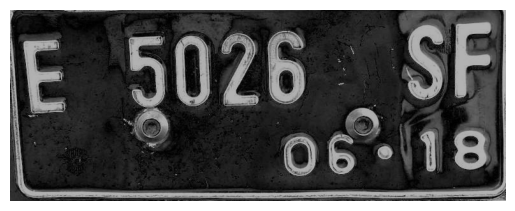

In [16]:
# Reduce the saturation
saturation_factor = 1.3 # Adjust the factor as needed (0.0 means fully desaturated)
img_3_desaturated = cv2.convertScaleAbs(img_3_gray, alpha=1, beta=(1 - saturation_factor) * 255)

# Display the desaturated image
plt.imshow(cv2.cvtColor(img_3_desaturated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [17]:
pixel_vals_img_3_desaturated = img_3_desaturated.reshape((-1, 3))
pixel_vals_img_3_desaturated = np.float32(pixel_vals_img_3_desaturated)

# Perform k-means clustering
retval, labels, centers = cv2.kmeans(pixel_vals_img_3_desaturated, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img_3_desaturated.shape))
clustered_images[2] = segmented_image

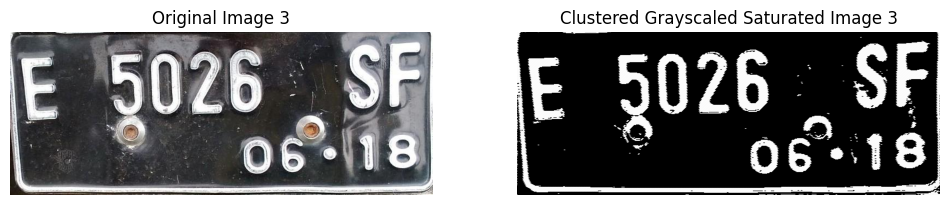

In [18]:
# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Display the original image on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.imshow(cv2.cvtColor(img_list[2], cv2.COLOR_BGR2RGB))
plt.title(f'Original Image 3')
plt.axis('off')

# Display the segmented image on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.imshow(segmented_image, cmap='gray')
plt.title(f'Clustered Grayscaled Saturated Image 3')
plt.axis('off')

plt.show()

# Evaluasi Hasil Segmentasi

1. Install library

In [19]:
# Install pytesseract and Tesseract in Colab
!pip install pytesseract
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev

from pytesseract import pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 4s (1,105 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

2. Image 1

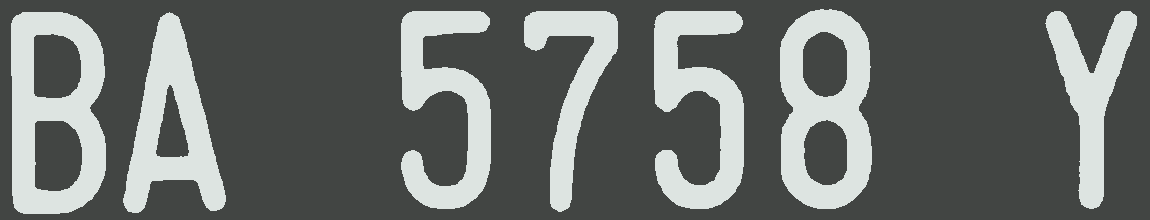

In [151]:
# Convert the segmented image to grayscale
grayscale_segmented_image = cv2.cvtColor(clustered_images[0], cv2.COLOR_BGR2GRAY)

# Invert the colors (dark text on white background)
inverted_grayscale_segmented_image = cv2.bitwise_not(grayscale_segmented_image)
segmented_image_croped_1 = clustered_images[0][30:250, 30:1180]
cv2_imshow(segmented_image_croped_1)

In [153]:
from PIL import Image

pil_img = Image.open('/content/drive/MyDrive/Machine_Learning/UTS/5.jpg')
# Perform OCR to recognize characters
recognized_text = pytesseract.image_to_string(segmented_image_croped_1)

# Ground truth license plate characters
ground_truth = 'BA 5758 Y'  # Replace with actual ground truth

# Calculate character recognition accuracy
correct_characters = 0
for gt_char, rec_char in zip(ground_truth, recognized_text):
    if gt_char == rec_char:
        correct_characters += 1

total_characters = len(ground_truth)
accuracy = correct_characters / total_characters * 100.0

print(f'Ground Truth: {ground_truth}')
print(f'Recognized Text: {recognized_text}')
print(f'Character Recognition Accuracy: {accuracy:.2f}%')

Ground Truth: BA 5758 Y
Recognized Text: BA 5758 Y

Character Recognition Accuracy: 100.00%


3. Image 2

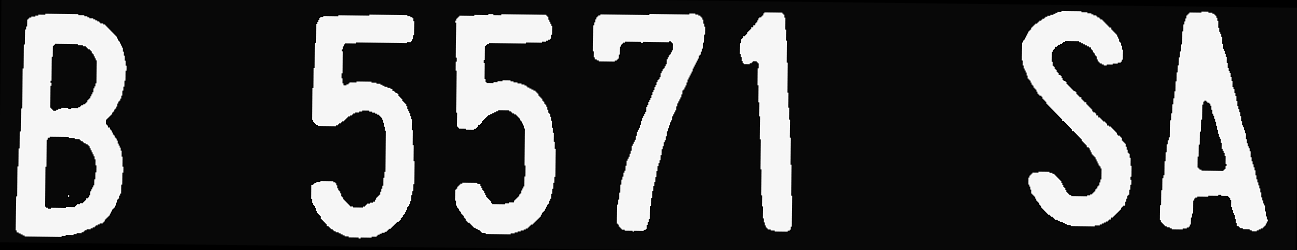

In [114]:
segmented_image_croped_2 = clustered_images[1][40:290]

# Define the gamma value you want to apply (e.g., 1.5 for increasing gamma)
gamma = 2
# Apply gamma correction
gamma_corrected = np.power(segmented_image_croped_2 / 255.0, gamma) * 255.0
gamma_corrected = gamma_corrected.astype(np.uint8)

# Convert the gamma-corrected image to grayscale
grayscale_image = cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2GRAY)
# Define the exposure increase factor (e.g., 1.5 for a 50% increase)
exposure_factor = 1.5

# Apply the exposure increase
brightened_image = cv2.convertScaleAbs(grayscale_image, alpha=exposure_factor)

# Define the kernel for unsharp masking
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])

# Apply the convolution to sharpen the image
sharpened_image = cv2.filter2D(brightened_image, -1, kernel)

# Define the rotation angle in degrees (e.g., 5 degrees counterclockwise)
rotation_angle = -0.69

# Get the height and width of the image
height, width = sharpened_image.shape[:2]

# Calculate the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), rotation_angle, 1)

# Apply the rotation to the image
rotated_image = cv2.warpAffine(sharpened_image, rotation_matrix, (width, height), flags=cv2.INTER_LINEAR)

# Display the rotated image
cv2_imshow(rotated_image)

In [152]:
from PIL import Image

pil_img = Image.open('/content/drive/MyDrive/Machine_Learning/UTS/5.jpg')
# Perform OCR to recognize characters
recognized_text = pytesseract.image_to_string(rotated_image)

# Ground truth license plate characters
ground_truth = 'B 5571 SA'  # Replace with actual ground truth

# Calculate character recognition accuracy
correct_characters = 0
for gt_char, rec_char in zip(ground_truth, recognized_text):
    if gt_char == rec_char:
        correct_characters += 1

total_characters = len(ground_truth)
accuracy = correct_characters / total_characters * 100.0

print(f'Ground Truth: {ground_truth}')
print(f'Recognized Text: {recognized_text}')
print(f'Character Recognition Accuracy: {accuracy:.2f}%')

Ground Truth: B 5571 SA
Recognized Text: B 5571 SA

Character Recognition Accuracy: 100.00%


4. Image 3

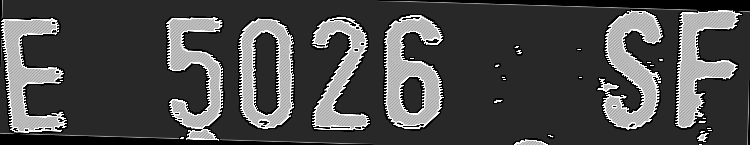

In [189]:
segmented_image_croped_2 = clustered_images[2][20:165, 20:770]
# Define the rotation angle in degrees (e.g., 5 degrees counterclockwise)
rotation_angle = -1.7

# Get the height and width of the image
height, width = segmented_image_croped_2.shape[:2]

# Calculate the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), rotation_angle, 1)

# Apply the rotation to the image
rotated_image_2 = cv2.warpAffine(segmented_image_croped_2, rotation_matrix, (width, height), flags=cv2.INTER_LINEAR)
# Define the gamma value you want to apply (e.g., 1.5 for increasing gamma)
gamma = 1
# Apply gamma correction
gamma_corrected = np.power(rotated_image_2 / 255.0, gamma) * 255.0
gamma_corrected = gamma_corrected.astype(np.uint8)

# Define the exposure increase factor (e.g., 1.5 for a 50% increase)
exposure_factor = 1.2

# Apply the exposure increase
brightened_image = cv2.convertScaleAbs(gamma_corrected, alpha=exposure_factor)

# Define the kernel for unsharp masking
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])

# Apply the convolution to sharpen the image
sharpened_image = cv2.filter2D(brightened_image, -1, kernel)
cv2_imshow(sharpened_image)

In [192]:
# Perform OCR to recognize characters
recognized_text = pytesseract.image_to_string(sharpened_image)

# Ground truth license plate characters
ground_truth = 'E 5026 SF'  # Replace with actual ground truth

# Calculate character recognition accuracy
correct_characters = 0
for gt_char, rec_char in zip(ground_truth, recognized_text):
    if gt_char == rec_char:
        correct_characters += 1

total_characters = len(ground_truth)
accuracy = correct_characters / total_characters * 100.0

print(f'Ground Truth: {ground_truth}')
print(f'Recognized Text: {recognized_text}')
print(f'Character Recognition Accuracy: {accuracy:.2f}%')

Ground Truth: E 5026 SF
Recognized Text: 
Character Recognition Accuracy: 0.00%


5. Image 5

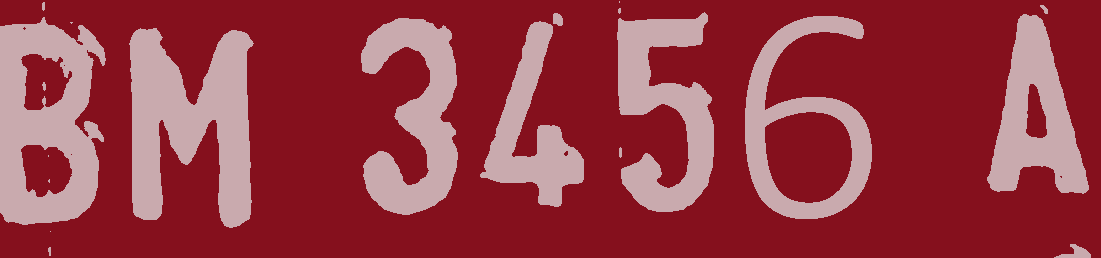

In [193]:
segmented_image_croped_5 = clustered_images[4]
cv2_imshow(segmented_image_croped_5)

In [195]:
# Perform OCR to recognize characters
recognized_text = pytesseract.image_to_string(segmented_image_croped_5)

# Ground truth license plate characters
ground_truth = 'BM 3456 A'  # Replace with actual ground truth

# Calculate character recognition accuracy
correct_characters = 0
for gt_char, rec_char in zip(ground_truth, recognized_text):
    if gt_char == rec_char:
        correct_characters += 1

total_characters = len(ground_truth)
accuracy = correct_characters / total_characters * 100.0

print(f'Ground Truth: {ground_truth}')
print(f'Recognized Text: {recognized_text}')
print(f'Character Recognition Accuracy: {accuracy:.2f}%')

Ground Truth: BM 3456 A
Recognized Text: BM 3456 A

Character Recognition Accuracy: 100.00%
